## *Exercises*

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
# import modules
import env
from wordcloud import WordCloud

# set display options
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

##### 1. Spam Data

- __*Load the spam data set.*__

In [4]:
url = env.get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")

In [5]:
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [7]:
ham_words = clean(' '.join(df[df.label == 'ham']['text']))
spam_words = clean(' '.join(df[df.label == 'spam']['text']))
all_words = clean(' '.join(df['text']))

- __*Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?*__

In [23]:
spam_bigrams = pd.Series(nltk.bigrams(spam_words))
ham_bigrams = pd.Series(nltk.bigrams(ham_words))
all_bigrams = pd.Series(nltk.bigrams(all_words))
# top_20
top_20_spam_bigrams = spam_bigrams.value_counts().head(20)
top_20_ham_bigrams = ham_bigrams.value_counts().head(20)
top_20_all_bigrams = all_bigrams.value_counts().head(20)

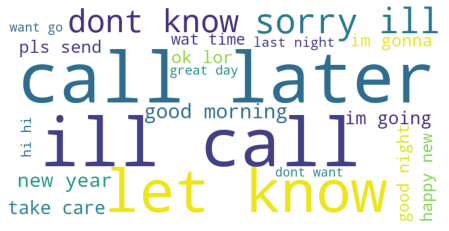

In [24]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

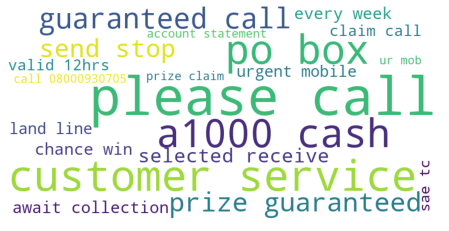

In [25]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_spam_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

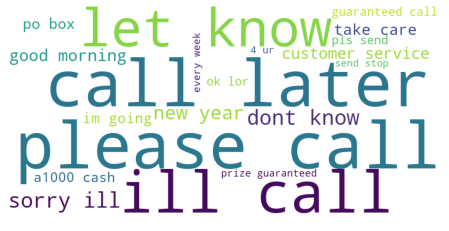

In [26]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_all_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

- __*Is there any overlap in the bigrams for the spam data and the ham data?*__

In [27]:
spam_freq = spam_bigrams.value_counts()
ham_freq = ham_bigrams.value_counts()
all_freq = all_bigrams.value_counts()

In [44]:
bigram_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
                .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

bigram_counts.sort_values(by='all', ascending=False).head()

,,all,ham,spam
please,call,53,9,44
call,later,52,52,0
ill,call,48,48,0
let,know,42,42,0
sorry,ill,39,39,0


In [42]:
#bigram_counts[(bigram_counts.ham > 1) & (bigram_counts.spam > 1)]

In [49]:
bigram_counts.shape

(38747, 3)

In [48]:
# remove bigrams where spam and ham words have same frequency 
for i in range(1, 5):
    bigram_counts.drop(bigram_counts[(bigram_counts.ham == i) & (bigram_counts.spam == i)].index, inplace =True)

- __*Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.*__

In [52]:
def get_ngram_frequency(ser:pd.Series, n:int = 1)->pd.Series:
    words = ' '.join(ser).split()
    if n > 1:
        ngrams = nltk.ngrams(words,n)
        words = [' '.join(n) for n in ngrams]
    return pd.Series(words).value_counts()

In [53]:
get_ngram_frequency(spam_words, 3)

prize guaranteed call     21
call customer service     15
land line claim           14
reply call 08000930705    14
private 2003 account      13
                          ..
cw25wx 150ppm call         1
326 cw25wx 150ppm          1
a5000 cash await           1
holiday a5000 cash         1
now1 10p per               1
Length: 8112, dtype: int64

In [56]:
spam_trigrams = pd.Series(nltk.ngrams(spam_words, 3))
ham_trigrams = pd.Series(nltk.ngrams(ham_words, 3))
all_trigrams = pd.Series(nltk.ngrams(all_words, 3))
# frequencies
spam_freq3 = spam_trigrams.value_counts()
ham_freq3 = ham_trigrams.value_counts()
all_freq3 = all_trigrams.value_counts()

# top_20
top_20_spam_trigrams = spam_trigrams.value_counts().head(20)
top_20_ham_trigrams = ham_trigrams.value_counts().head(20)
top_20_all_trigrams = all_trigrams.value_counts().head(20)

In [57]:
top_20_ham_trigrams

(ill, call, later)          42
(sorry, ill, call)          38
(happy, new, year)          19
(pls, send, message)        13
(cant, pick, phone)         12
(right, pls, send)          12
(phone, right, pls)         12
(pick, phone, right)        12
(hi, hi, hi)                11
(x, x, x)                    8
(good, morning, dear)        7
(call, later, meeting)       6
(convey, birthday, wish)     6
(pls, convey, birthday)      6
(kiss, across, sea)          6
(lunch, lunch, invited)      5
(man, last, week)            5
(story, man, last)           5
(sad, story, man)            5
(love, go, day)              5
dtype: int64

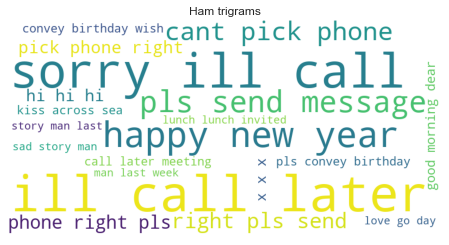

In [61]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_ham_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.title('Ham trigrams')
plt.axis('off')
plt.show()

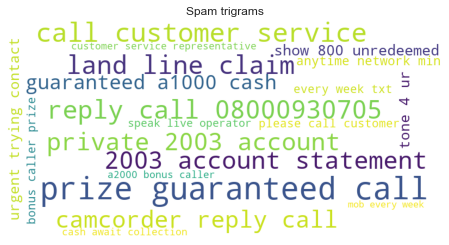

In [62]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_spam_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.title('Spam trigrams')
plt.axis('off')
plt.show()

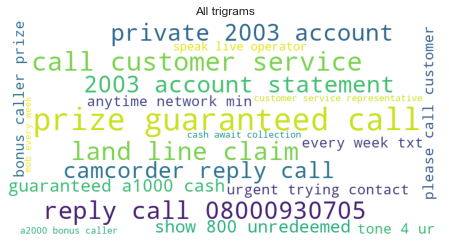

In [63]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_spam_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.title('All trigrams')
plt.axis('off')
plt.show()

In [69]:
# check overlaps
trigram_counts = (pd.concat([all_freq3, ham_freq3, spam_freq3], axis=1, sort=True)
                .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

trigram_counts.sort_values(by='all', ascending=False).head(20)

,,,all,ham,spam
ill,call,later,42,42,0
sorry,ill,call,38,38,0
prize,guaranteed,call,21,0,21
happy,new,year,19,19,0
call,customer,service,15,0,15
reply,call,08000930705,14,0,14
land,line,claim,14,0,14
private,2003,account,13,0,13
2003,account,statement,13,0,13
pls,send,message,13,13,0


In [68]:
trigram_counts[(trigram_counts.ham == 1) & (trigram_counts.spam == 1)]

,,,all,ham,spam
called,left,message,2,1,1
new,year,eve,2,1,1
number,im,glad,2,1,1


##### 2. Explore the blog articles using the techniques discussed in the exploration lesson.

##### 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.